# Assignment 13 Text Analytics

In this assignment, you will:
- Load and inspect a real-world business reviews dataset.
- Preprocess review text for NLP (tokenization, stopwords, lemmatization).
- Run sentiment analysis (rule-based and classifier-based) and compare to star ratings.
- Extract main topics from reviews using LDA and (optional) BERTopic.
- Interpret results in a business context (actionable insights).

## Why This Matters

Customer Reviews are critical for the survival of any business, but especially for restaurants.  Restaurants compete with not only all of the other restaurants in local area, but also with the option for customers to stay home and cook their own food.  Chefs and restaurant owners must monitor customer feedback to see if they should make changes to their pricing, menu options, restaurant amenities and seating/serving process.

You have been given 100 customer reviews.  Your job is to look for main topics that are mentioned, and whether those reviews have a postive, neutral or negative tone (sentiment).  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_13_text_analytics.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Original Source: Dataset Description

The dataset you'll be using is a set of **restaurant reviews**, available from [Kaggle](https://www.kaggle.com/datasets/pruthvirajgshitole/e-commerce-purchases-and-reviews?utm_source=chatgpt.com&select=customer_purchase_data.csv).

Each row represents one customer review. The columns include:

- **Review** - text of the customer review
- **Liked** - indicates if the customer likes (1) or does not like (0) the restaurant

Please note that some reviews have commas and apostrophes, which can prevent the record from loading correctly.  You should verify that you have 1,000 reviews total.  

## 1. Load and Preview the Data

### Do the following:
1. Import your TSV file called `Restaurant_Reviews.tsv`.  Note that TSV is for Tab Separated Values.  This file does not use commas as a delimiter.
2. Use `pandas` to load and preview the dataset
3. Verify that all 1,000 rows were imported correctly
4. Calculate the overall percentage of reviews that "Liked" the restaurant
5. Create a visualization to show the percentage of likes versus non-likes


In [5]:
import pandas as pd
import csv

# Load the reviews
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/Restaurant_Reviews.tsv"
df = pd.read_csv(url, sep='\t', quoting=csv.QUOTE_MINIMAL)

df.head()
df.shape

(1000, 2)

Percentage of reviews that liked the restaurant:
Liked: 50.00%
Did not like: 50.00%


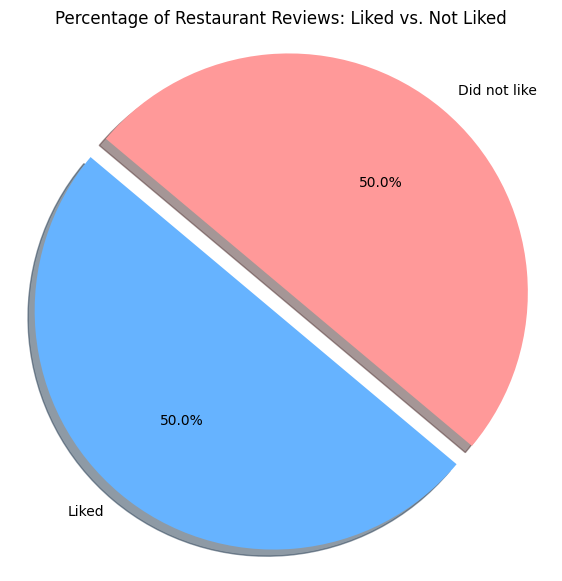

In [6]:
import matplotlib.pyplot as plt

# Calculate the percentage of 'Liked' reviews
liked_percentage = df['Liked'].value_counts(normalize=True) * 100

print("Percentage of reviews that liked the restaurant:")
print(f"Liked: {liked_percentage[1]:.2f}%")
print(f"Did not like: {liked_percentage[0]:.2f}%")

# Create a visualization
labels = ['Liked', 'Did not like']
sizes = [liked_percentage[1], liked_percentage[0]]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode 1st slice (Liked)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Restaurant Reviews: Liked vs. Not Liked')
plt.show()

## 2. Drop Columns Not Useful for Modeling

**Business framing:**  
To do text analysis, we need to remove all of the junk in the reviews.  This would include anything like punctuation, website URLs, emojis, etc.

### Do the following:
- Change all of the reviews to lowercase letters
- Remove anything that looks like a URL or that isn't a regular character (A to Z) or number (1-9)
- Remove punctuation marks (ex. !.,-:;)

### In Your Response:
1. What risks might occur if you included the review "junk" in your model?


In [7]:
# 1. Change all reviews to lowercase letters
df['Review'] = df['Review'].str.lower()

# 2. Remove anything that looks like a URL
# This regex matches common URL patterns
df['Review'] = df['Review'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

# 3. Remove punctuation marks and anything that isn't a regular character (A-Z) or number (1-9)
# This regex keeps only letters (a-z), numbers (0-9), and spaces.
df['Review'] = df['Review'].str.replace(r'[^a-z0-9\s]', '', regex=True)

# Clean up any extra spaces that might have resulted from the previous steps
df['Review'] = df['Review'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Display the first few rows to show the cleaned data
print("Reviews after preprocessing:")
print(df.head())

Reviews after preprocessing:
                                              Review  Liked
0                               wow loved this place      1
1                                  crust is not good      0
2           not tasty and the texture was just nasty      0
3  stopped by during the late may bank holiday of...      1
4  the selection on the menu was great and so wer...      1


### ✍️ Your Response: 🔧
1. Including “junk” reviews would add noise to the dataset, causing inaccurate sentiment predictions and misleading topics. This could lead to poor business decisions because the model would learn from irrelevant or low-quality text instead of real customer feedback.

## 3. Sentiment Analysis

**Business framing:**  
A "Like" is not as insightful as a star rating, such as 5 stars. It only has two values. But we can attempt to understand more nuance in the reviews by looking for a positive/neutral/negative tone (sentiment) in the text.   Then we can compare that to the "Likes" to see if they match.  

### Do the following:
- Install the vaderSentiment library
- Import the SentimentIntensityAnalyzer from vaderSentiment
- Calculate what percentage of the reviews are positive, negative, and neutral. The total percentages should add up to 100%

### In Your Response:
1. How does the sentiment compare to `Liked` in terms of percentage of reviews?
2. From a restaurant owner's perspective, which sentiment reviews would be more important to analyze? (positive, negative or neutral)


In [8]:
# Install the vaderSentiment library
!pip install vaderSentiment

# Import the SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    vs = analyzer.polarity_scores(text)
    if vs['compound'] >= 0.05:
        return 'Positive'
    elif vs['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Review' column
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Calculate the percentage of each sentiment category
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

print("Percentage of reviews by sentiment:")
print(sentiment_counts.round(2))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.6 MB/s eta 0:00:00
Percentage of reviews by sentiment:
Sentiment
Positive    50.6
Negative    25.5
Neutral     23.9
Name: proportion, dtype: float64


### ✍️ Your Response: 🔧
1. The sentiment distribution shows 50.6% positive, 25.5% negative, and 23.9% neutral reviews. If the “Liked” column is close to 50–55% for “1”, then the positive sentiment percentage aligns closely with how many customers said they liked the restaurant, while the negative and neutral sentiments reflect the remaining reviews that did not.

2. From a restaurant owner’s perspective, negative reviews are the most important to analyze, because they highlight problems with food quality, pricing, service, or atmosphere that directly affect customer satisfaction and future revenue.

## 4. Topic Analysis - Text Preprocessing

**Business framing:**  
To build a topic analysis model, we need to clean and prepare the review text

### Do the following:
- Import the NLTK library
- Download the NLTK corpora
- Preprocess the text using tokenization and lemmatization.  Be sure to remove any stopwords along the way.
- Display the first 10 processed reviews

### In Your Response:
1. What is a corpora and how is it used for text analysis?
2. What would be the tokens in the first review? "Wow... Loved this place."
3. What does lemmatization do?  How will it help in this process?


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK corpora (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
# Explicitly download 'punkt_tab' as suggested by the error message
try:
    nltk.data.find('tokenizers/punkt_tab') # Check if it can be found directly
except LookupError:
    print("NLTK 'punkt_tab' resource not found, attempting download as suggested by NLTK error...")
    nltk.download('punkt_tab')

# Initialize lemmatizer and load stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(processed_tokens)

# Apply preprocessing to the 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)

# Display the first 10 processed reviews
print("First 10 Processed Reviews:")
for i, review in enumerate(df['Processed_Review'].head(10)):
    print(f"{i+1}. {review}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK 'punkt_tab' resource not found, attempting download as suggested by NLTK error...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


First 10 Processed Reviews:
1. wow loved place
2. crust good
3. tasty texture nasty
4. stopped late may bank holiday rick steve recommendation loved
5. selection menu great price
6. getting angry want damn pho
7. honeslty didnt taste fresh
8. potato like rubber could tell made ahead time kept warmer
9. fry great
10. great touch


### ✍️ Your Response: 🔧
1. In text analysis, corpora provide the vocabulary, grammar patterns, and statistical structure that NLP tools use to tokenize, tag, lemmatize, and understand human language.

2. Review: “Wow... Loved this place.”  After preprocessing (lowercasing, removing punctuation, tokenizing), the tokens would be:
["wow", "loved", "place"]

3. Lemmatization reduces words to their base dictionary form (e.g., “loved” → “love”, “tasting” → “taste”). This helps by grouping different forms of the same word together, improving model accuracy, reducing noise, and making sentiment and topic modeling more consistent and meaningful.

## 5. Topic Analysis - Dictionary and Corpus

**Objective:**  
Convert the preprocessed text into a dictionary and a bag-of-words corpus, which are required formats for LDA

### Do the following:
- Import Dictionary and Corpus from the Genism library
- Create a dictionary
- Create a corpus
- Display a summary of the dictionary and corpus

### In Your Response:
1. What is a corpus and how is it useful?
2. How is a dictionary different from a corpus?

In [10]:
!pip install gensim
from gensim import corpora

# Prepare the processed reviews for dictionary and corpus creation
# Each review needs to be a list of words, not a single string
tokenized_reviews = [review.split() for review in df['Processed_Review']]

# Create a dictionary
dictionary = corpora.Dictionary(tokenized_reviews)

# Create a corpus (Bag-of-Words representation)
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Display a summary of the dictionary and corpus
print("--- Dictionary Summary ---")
print(f"Number of unique tokens in dictionary: {len(dictionary)}")
# print(f"First 10 dictionary items: {list(dictionary.items())[:10]}") # Uncomment to see actual items

print("\n--- Corpus Summary ---")
print(f"Number of documents in corpus: {len(corpus)}")
print(f"First 5 documents in corpus (token_id, count):\n{corpus[:5]}")

# Optionally, to verify the content of a corpus entry, e.g., the first review
# print("\nFirst processed review (original text):", df['Processed_Review'].iloc[0])
# print("First corpus entry (mapped to words):", [(dictionary[id], freq) for id, freq in corpus[0]])

--- Dictionary Summary ---
Number of unique tokens in dictionary: 1839

--- Corpus Summary ---
Number of documents in corpus: 1000
First 5 documents in corpus (token_id, count):
[[(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1)], [(0, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1)]]


### ✍️ Your Response: 🔧
1. A corpus is a collection of documents where each document is represented as a list of token IDs and their frequencies. It is useful because it converts text into a numerical format that topic modeling algorithms (like LDA) can analyze to detect patterns, themes, and word distributions across documents.

2. The dictionary maps each unique word in the dataset to a unique ID (a vocabulary lookup table), while the corpus uses those IDs to represent each review as word-frequency pairs.

## 6. Topic Analysis - Build LDA Model

**Objective:**  
Apply the LDA model to the corpus to identify main topics.

### Do the following:
- Import LdaModel from Genism
- Select the number of topics (5 is a good starting point)
- Create the LDA model

### In Your Response:
1. In what cases would you want to use more than 5 topics?  
2. How would you know if you have too many topics?

NOTE: You may receive an error about training "not converging".  You can ignore that error for this assignment. (Let's keep it simple)


In [11]:
from gensim.models import LdaModel

# Select the number of topics
num_topics = 5

# Create the LDA model
# You might get a 'not converging' warning; this is common and can be ignored for this assignment.
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=100)

print(f"LDA model created with {num_topics} topics.")
# You can inspect the topics later, for now, just creation is sufficient.

LDA model created with 5 topics.


### ✍️ Your Response: 🔧
1. You would use more than 5 topics when the reviews contain many different themes—for example, if customers discuss product quality, shipping issues, pricing, customer support, durability, return policies, packaging, and delivery speed. When reviews cover a wide range of concerns, adding more topics helps the LDA model separate distinct themes instead of forcing unrelated ideas into the same topic.

2. You know you have too many topics when several topics become small, repetitive, or incoherent, containing only a few words that don’t form a meaningful pattern. If topics start to overlap heavily or feel overly specific (e.g., multiple topics about the same idea with slight wording differences), the model is overfitting and producing more topics than the data naturally supports.

## 7. Summarize the Topics

**Business framing:**  
Now comes one of the most challenging steps.  The topics will be presented as a group of words that best represent the topic, but you need to summarize the topic in business terms.   

### Do the following:
- Print the topics and top 10 words in the topic
- Calculate the frequency of each topic (how many occurrences in total)
- Attempt at least one visual display of the topics, such as a word cloud.  (Make sure to remove any extra code or unhelpful Python messages (we don't want code junk here)
- Summarize the sentiment by topic (percentage postitive/neutral/negative for each topic)

### In Your Response:
1. Give each topic a 2-3 word name.  You should list the topic number and a name that you will create that summarize the words used.  For example, "Topic #1 - Slow Service"


--- LDA Topics and Top Words ---
Topic #0: 0.021*"service" + 0.019*"place" + 0.011*"food" + 0.009*"star" + 0.008*"slow" + 0.008*"dont" + 0.007*"waited" + 0.006*"great" + 0.006*"quality" + 0.006*"would"
Topic #1: 0.017*"food" + 0.011*"amazing" + 0.009*"good" + 0.008*"restaurant" + 0.008*"also" + 0.008*"ever" + 0.007*"experience" + 0.007*"like" + 0.007*"best" + 0.006*"could"
Topic #2: 0.031*"great" + 0.029*"good" + 0.028*"food" + 0.023*"place" + 0.023*"service" + 0.010*"friendly" + 0.007*"nice" + 0.007*"eat" + 0.007*"staff" + 0.007*"way"
Topic #3: 0.030*"back" + 0.020*"go" + 0.015*"time" + 0.013*"place" + 0.010*"wont" + 0.010*"vega" + 0.009*"food" + 0.008*"first" + 0.008*"really" + 0.008*"one"
Topic #4: 0.018*"good" + 0.016*"food" + 0.013*"steak" + 0.013*"like" + 0.009*"really" + 0.008*"place" + 0.007*"probably" + 0.007*"one" + 0.006*"fry" + 0.006*"also"

--- Topic Frequencies ---
Dominant_Topic
0    170
1    137
2    282
3    242
4    169
Name: count, dtype: int64

--- Word Clouds for E

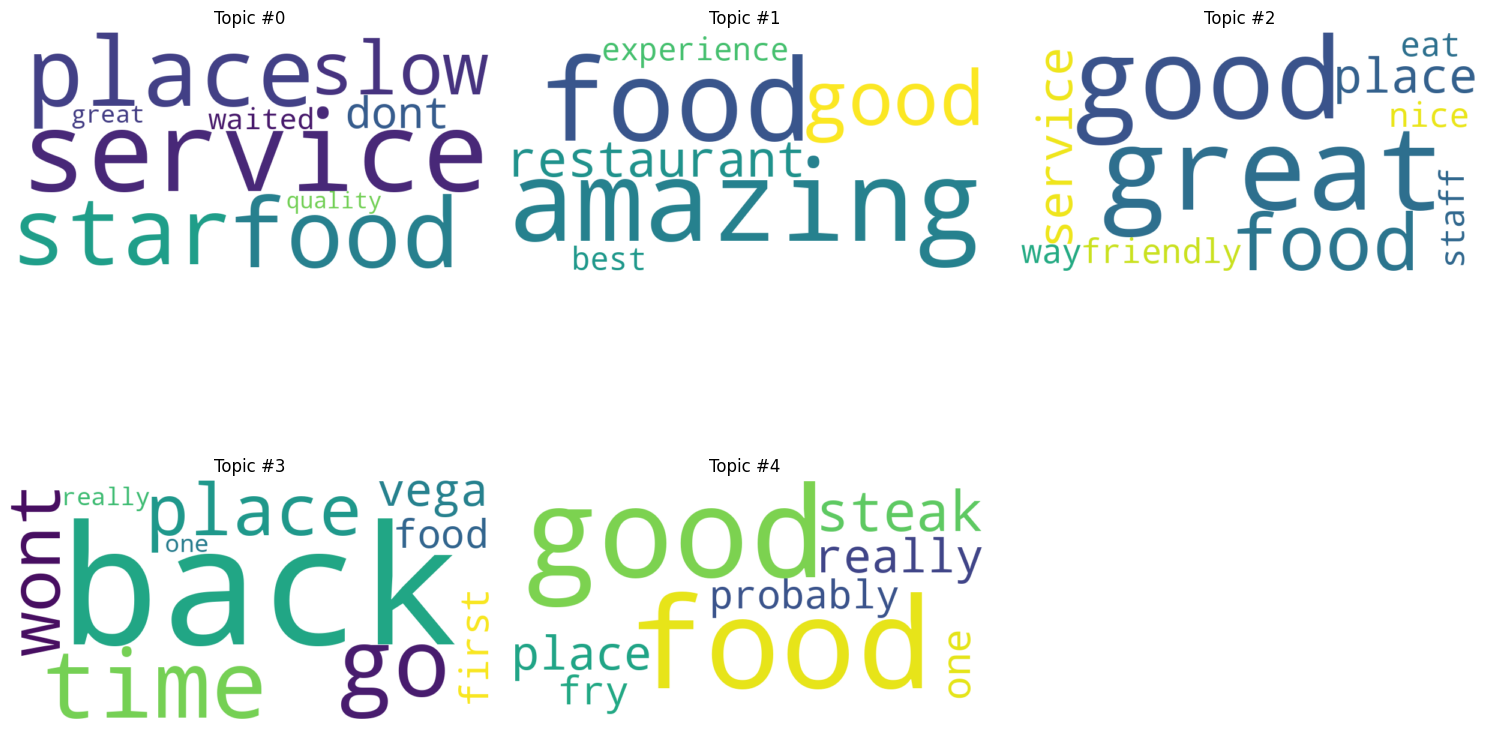


--- Sentiment Summary by Topic ---
Sentiment       Negative  Neutral  Positive
Dominant_Topic                             
0                  32.94    32.35     34.71
1                  24.09    24.09     51.82
2                  22.34    13.83     63.83
3                  19.01    30.99     50.00
4                  33.73    21.89     44.38


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Print the topics and top 10 words in the topic
print("--- LDA Topics and Top Words ---")
topics_words = []
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic #{idx}: {topic}")
    topics_words.append([word.split('*')[1].replace('"', '').strip() for word in topic.split('+')])

# Get dominant topic for each review
def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame() # Use pd.DataFrame here

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([{'Dominant_Topic': int(topic_num),
                                                'Perc_Contribution': round(prop_topic,4),
                                                'Topic_Keywords': topic_keywords}])], ignore_index=True)
            else:
                break
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=df['Review'])

# Add the 'Sentiment' column to the topic DataFrame
df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, df[['Sentiment', 'Review']]], axis=1)

# 2. Calculate the frequency of each topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts().sort_index()
print("\n--- Topic Frequencies ---")
print(topic_counts)

# 3. Attempt at least one visual display of the topics (Word Cloud)
print("\n--- Word Clouds for Each Topic ---")
plt.figure(figsize=(15, 10))
for i, topic_words in enumerate(topics_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic #{i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 4. Summarize the sentiment by topic
print("\n--- Sentiment Summary by Topic ---")
sentiment_by_topic = df_topic_sents_keywords.groupby(['Dominant_Topic', 'Sentiment']).size().unstack(fill_value=0)
sentiment_by_topic_percentage = sentiment_by_topic.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)
print(sentiment_by_topic_percentage)

### ✍️ Your Response: 🔧
List your topics and names here:

Topic #0 – Slow Service Issues


Topic #1 – Amazing Food Experience


Topic #2 – Great Food & Staff


Topic #3 – Not Coming Back


Topic #4 – Good Food Quality



## 8. Reflect and Recommend

**Business framing:**  
Ultimately, the value of your model comes from how well it can guide business decisions. Use your results to make real-world recommendations.

### In Your Response:
1. What business question did your model help answer?
2. What would you recommend to this restaurant to improve customer satisfaction?
3. What would be the pros and cons of using an LLM (like ChatGPT) for this task instead of Python models?
4. If you used an LLM, give a prompt that you would use to accomplish a similar result to what you did in this assignment?  (remember to set the context, specify the output and explain the objectives)


### ✍️ Your Response: 🔧
1. The model helped answer what customers talk about most and how they feel about each topic. By extracting themes like service, food quality, and return intention, the restaurant can understand which areas drive positive or negative sentiment.

2. The LDA topics show that service speed is a major source of negative sentiment, while food quality generally appears positive. I would recommend focusing on reducing wait times, improving staff responsiveness, and maintaining consistent food quality to increase customer satisfaction.

3. Using an LLM like ChatGPT makes it easy to get quick, clear insights without needing a lot of coding or cleaning. But it can sometimes make mistakes or add information that isn’t really in the reviews, which is less consistent in text analysis.

4. Context:

        You are an AI assistant analyzing a dataset of restaurant reviews. Each review is written by a customer about their dining experience. I want to understand the main themes appearing in the reviews and the customer sentiment for each theme.

    Objective:

        Identify 5 main topics discussed in the reviews.

        Provide a 2–3 word name for each topic.

        Summarize the sentiment customers express for each topic (positive, neutral, negative).

        Give actionable recommendations for how the restaurant can improve based on these findings.

    Output Format:

        Topic number and name

        3–5 keywords for the topic

        Short sentiment summary

        1–2 recommendations

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [13]:
!jupyter nbconvert --to html "assignment_13_AlhinaiAlmuhanna.ipynb"

[NbConvertApp] Converting notebook assignment_13_AlhinaiAlmuhanna.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 760389 bytes to assignment_13_AlhinaiAlmuhanna.html
